<a href="https://colab.research.google.com/github/SattuSupCodes/SentimentAnalysis_TheoreticalLearning/blob/main/speaker_diarisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import librosa
import numpy as np




In [2]:
!pip install --upgrade numpy scipy librosa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.0/35.0 MB 52.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.3
    Uninstalling scipy-1.16.3:
      Successfully uninstalled scipy-1.16.3


In [3]:
!pip install openai-whisper


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 803.2/803.2 kB 38.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.3/188.3 MB 5.2 MB/s eta 0:00:00
  Created wheel for openai-whisper: filename=openai_whisper-20250625-py3-none-any.whl size=803980 sha256=a8031422b7055ecf2305f3aedb85888dbc9b14e5db7e32b61e190fdac4bcac15
  Stored in directory: /root/.cache/pip/wheels/61/d2/20/09ec9bef734d126cba375b15898010b6cc28578d8afdde5869
Successfully built openai-whisper


In [4]:
import whisper

model = whisper.load_model("base")
result = model.transcribe("sample4.wav")

segments = result["segments"]
for seg in segments:
    print(f"{seg['start']:.2f}-{seg['end']:.2f}: {seg['text']}")


100%|████████████████████████████████████████| 139M/139M [00:00<00:00, 247MiB/s]
/usr/local/lib/python3.12/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


0.00-6.60:  I'd love to have you talk to the person who is with us right now.
6.60-11.72:  They've either hit play in this episode and taken us on a walk or you and I are in their
11.72-17.84:  car or at work or in their kitchen as they've got their earbuds in.
17.84-24.64:  And I'd love for you to tell the person listening what might change about their life and their
24.64-28.36:  friendships and how they feel about themselves.
28.36-32.12:  If they take everything that you're about to share with us to heart and they apply it to
32.12-33.12:  their life.
33.12-37.92:  I think that by the time they're done listening or watching it, they feel instantly more
37.92-46.32:  confident, less alone about any secret, private struggles that they're experiencing in their
46.32-47.32:  friendships.
47.32-52.76:  And I'm hoping that it increases their level of optimism about all that is available
52.76-55.00:  to them in friendship.
55.00-59.08:  That's what I'm really hoping for by the time that 

In [6]:
y, sr = librosa.load("sample4.wav", sr=None)


In [7]:
segment_len = int(1.5 * sr)
segments = [
    y[i:i+segment_len]
    for i in range(0, len(y), segment_len)
    if len(y[i:i+segment_len]) == segment_len
]


In [8]:



segment_len_sec = 1.5
segment_len = int(segment_len_sec * sr)

segments_audio = [
    y[i:i+segment_len]
    for i in range(0, len(y), segment_len)
    if len(y[i:i+segment_len]) == segment_len
]


In [9]:
def extract_mfcc(seg, sr):
    mfcc = librosa.feature.mfcc(y=seg, sr=sr, n_mfcc=13)
    return np.mean(mfcc, axis=1)

X = np.array([extract_mfcc(seg, sr) for seg in segments])


In [10]:
def mfcc_embed(seg, sr):
    mfcc = librosa.feature.mfcc(y=seg, sr=sr, n_mfcc=13)
    return np.mean(mfcc, axis=1)

X = np.array([mfcc_embed(seg, sr) for seg in segments_audio])


# Agglomerative Clustering
basically, we segmented our audio into many segments of 1.5 secs (we assume that thee spealers are consistent)

then our already-existng (thank you python-gods) agglomerative clustering helps in "this segment sounds very similar to this segment. CLUSTER" and boom

speaker 0 and speaker 1

In [11]:
from sklearn.cluster import AgglomerativeClustering

clusterer = AgglomerativeClustering(n_clusters=2)
labels = clusterer.fit_predict(X)


In [12]:
from sklearn.cluster import AgglomerativeClustering

labels = AgglomerativeClustering(n_clusters=2).fit_predict(X)
from sklearn.cluster import AgglomerativeClustering

labels = AgglomerativeClustering(n_clusters=2).fit_predict(X)


In [13]:
for i, label in enumerate(labels):
    start = i * 1.5
    end = start + 1.5
    print(f"{start:.1f}s - {end:.1f}s : Speaker {label}")


0.0s - 1.5s : Speaker 1
1.5s - 3.0s : Speaker 0
3.0s - 4.5s : Speaker 1
4.5s - 6.0s : Speaker 0
6.0s - 7.5s : Speaker 1
7.5s - 9.0s : Speaker 0
9.0s - 10.5s : Speaker 0
10.5s - 12.0s : Speaker 0
12.0s - 13.5s : Speaker 0
13.5s - 15.0s : Speaker 0
15.0s - 16.5s : Speaker 0
16.5s - 18.0s : Speaker 0
18.0s - 19.5s : Speaker 0
19.5s - 21.0s : Speaker 0
21.0s - 22.5s : Speaker 1
22.5s - 24.0s : Speaker 0
24.0s - 25.5s : Speaker 0
25.5s - 27.0s : Speaker 0
27.0s - 28.5s : Speaker 1
28.5s - 30.0s : Speaker 0
30.0s - 31.5s : Speaker 0
31.5s - 33.0s : Speaker 0
33.0s - 34.5s : Speaker 0
34.5s - 36.0s : Speaker 0
36.0s - 37.5s : Speaker 0
37.5s - 39.0s : Speaker 0
39.0s - 40.5s : Speaker 0
40.5s - 42.0s : Speaker 0
42.0s - 43.5s : Speaker 0
43.5s - 45.0s : Speaker 0
45.0s - 46.5s : Speaker 0
46.5s - 48.0s : Speaker 1
48.0s - 49.5s : Speaker 0
49.5s - 51.0s : Speaker 0
51.0s - 52.5s : Speaker 0
52.5s - 54.0s : Speaker 1
54.0s - 55.5s : Speaker 0
55.5s - 57.0s : Speaker 0
57.0s - 58.5s : Speaker 0

In [14]:
labels = labels.flatten()

def assign_speaker(start_time):
    idx = int(start_time / segment_len_sec)
    if idx < 0 or idx >= len(labels):
        return -1
    return int(labels[idx])

for seg in result["segments"]:
    spk = assign_speaker(seg["start"])
    print(f"[Speaker {spk}] {seg['text']}")

[Speaker 1]  I'd love to have you talk to the person who is with us right now.
[Speaker 1]  They've either hit play in this episode and taken us on a walk or you and I are in their
[Speaker 0]  car or at work or in their kitchen as they've got their earbuds in.
[Speaker 0]  And I'd love for you to tell the person listening what might change about their life and their
[Speaker 0]  friendships and how they feel about themselves.
[Speaker 1]  If they take everything that you're about to share with us to heart and they apply it to
[Speaker 0]  their life.
[Speaker 0]  I think that by the time they're done listening or watching it, they feel instantly more
[Speaker 0]  confident, less alone about any secret, private struggles that they're experiencing in their
[Speaker 0]  friendships.
[Speaker 1]  And I'm hoping that it increases their level of optimism about all that is available
[Speaker 1]  to them in friendship.
[Speaker 0]  That's what I'm really hoping for by the time that we're done

 # Its not strong enough
 our sampe1.wav had woman(kendal jenner hehehe) and man (jay shetty) talking - best result for segregation

 our sample4 (currently used) had two women of different race  - average segregation

 our sample 3 had three young adult girls (HAHA Podcast of the Ha sisters) - worst segregation i've ever seen. It only clusetered ONE.

 Hence,

 # MFCC Has Its Own Limitations

# CHECKPOINT TO BUILD SOMETHING STRONGER

In [ ]:
# !pip install --quiet \
#   numpy==1.26.4 \
#   torch==2.1.2 \
#   torchaudio==2.1.2 \
#   speechbrain


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.6 MB/s eta 0:00:00
ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement torch==2.1.2 (from versions: 2.2.0, 2.2.1, 2.2.2, 2.3.0, 2.3.1, 2.4.0, 2.4.1, 2.5.0, 2.5.1, 2.6.0, 2.7.0, 2.7.1, 2.8.0, 2.9.0, 2.9.1)
ERROR: No matching distribution found for torch==2.1.2


# EVERYTHING IS BREAKING
Why is ntg working (a dilemma every engineer finds themselves in)

In [ ]:
# import torchaudio
# print(torchaudio.__version__)
# print(torchaudio.list_audio_backends())


2.9.1+cu128


AttributeError: module 'torchaudio' has no attribute 'list_audio_backends'

#Now that Pyannote and Speechbrain is out of question

Pyannote needs hugging face - my hugging face account is not being created like what kinda bug even is that

Speechbrain - im not downgrading my env

In [15]:
def mfcc_embed(seg, sr, n_mfcc=13):
    mfcc = librosa.feature.mfcc(y=seg, sr=sr, n_mfcc=n_mfcc)
    delta = librosa.feature.delta(mfcc)
    delta2 = librosa.feature.delta(mfcc, order=2)

    features = np.concatenate([
        np.mean(mfcc, axis=1),
        np.mean(delta, axis=1),
        np.mean(delta2, axis=1)
    ]) #lets just try making our mfcc stronger

    return features

In [16]:
def pitch_stats(seg, sr):
    pitch = librosa.yin(seg, fmin=50, fmax=400, sr=sr)
    pitch = pitch[~np.isnan(pitch)]
    if len(pitch) == 0:
        return [0, 0]
    return [np.mean(pitch), np.std(pitch)]


In [17]:
def full_embed(seg, sr):
    mfcc_feat = mfcc_embed(seg, sr)
    pitch_feat = pitch_stats(seg, sr)
    return np.concatenate([mfcc_feat, pitch_feat])


In [18]:
from sklearn.preprocessing import StandardScaler

X = np.array([full_embed(seg, sr) for seg in segments_audio])
X = StandardScaler().fit_transform(X)


In [19]:
from sklearn.cluster import AgglomerativeClustering

clusterer = AgglomerativeClustering(
    n_clusters=3,
    metric="cosine",
    linkage="average"
)

labels = clusterer.fit_predict(X)

In [20]:

np.unique(labels, return_counts=True)


(array([0, 1, 2]), array([18, 24, 25]))

In [21]:
for i, label in enumerate(labels):
    start = i * segment_len_sec
    end = start + segment_len_sec
    print(f"{start:.1f}s – {end:.1f}s : Speaker {label}")


0.0s – 1.5s : Speaker 0
1.5s – 3.0s : Speaker 2
3.0s – 4.5s : Speaker 1
4.5s – 6.0s : Speaker 1
6.0s – 7.5s : Speaker 0
7.5s – 9.0s : Speaker 2
9.0s – 10.5s : Speaker 2
10.5s – 12.0s : Speaker 1
12.0s – 13.5s : Speaker 2
13.5s – 15.0s : Speaker 2
15.0s – 16.5s : Speaker 2
16.5s – 18.0s : Speaker 0
18.0s – 19.5s : Speaker 2
19.5s – 21.0s : Speaker 1
21.0s – 22.5s : Speaker 0
22.5s – 24.0s : Speaker 2
24.0s – 25.5s : Speaker 0
25.5s – 27.0s : Speaker 2
27.0s – 28.5s : Speaker 0
28.5s – 30.0s : Speaker 2
30.0s – 31.5s : Speaker 2
31.5s – 33.0s : Speaker 1
33.0s – 34.5s : Speaker 0
34.5s – 36.0s : Speaker 0
36.0s – 37.5s : Speaker 0
37.5s – 39.0s : Speaker 1
39.0s – 40.5s : Speaker 1
40.5s – 42.0s : Speaker 0
42.0s – 43.5s : Speaker 1
43.5s – 45.0s : Speaker 1
45.0s – 46.5s : Speaker 0
46.5s – 48.0s : Speaker 0
48.0s – 49.5s : Speaker 2
49.5s – 51.0s : Speaker 1
51.0s – 52.5s : Speaker 0
52.5s – 54.0s : Speaker 1
54.0s – 55.5s : Speaker 0
55.5s – 57.0s : Speaker 1
57.0s – 58.5s : Speaker 1

In [22]:
def assign_speaker(start_time):
    idx = int(start_time // segment_len_sec)
    if idx >= len(labels):
        idx = len(labels) - 1
    return labels[idx]

for seg in result["segments"]:
    spk = assign_speaker(seg["start"])
    print(f"[Speaker {spk}] {seg['text']}")

[Speaker 0]  I'd love to have you talk to the person who is with us right now.
[Speaker 0]  They've either hit play in this episode and taken us on a walk or you and I are in their
[Speaker 1]  car or at work or in their kitchen as they've got their earbuds in.
[Speaker 0]  And I'd love for you to tell the person listening what might change about their life and their
[Speaker 0]  friendships and how they feel about themselves.
[Speaker 0]  If they take everything that you're about to share with us to heart and they apply it to
[Speaker 1]  their life.
[Speaker 0]  I think that by the time they're done listening or watching it, they feel instantly more
[Speaker 1]  confident, less alone about any secret, private struggles that they're experiencing in their
[Speaker 0]  friendships.
[Speaker 0]  And I'm hoping that it increases their level of optimism about all that is available
[Speaker 1]  to them in friendship.
[Speaker 0]  That's what I'm really hoping for by the time that we're done

# model is hallucinating

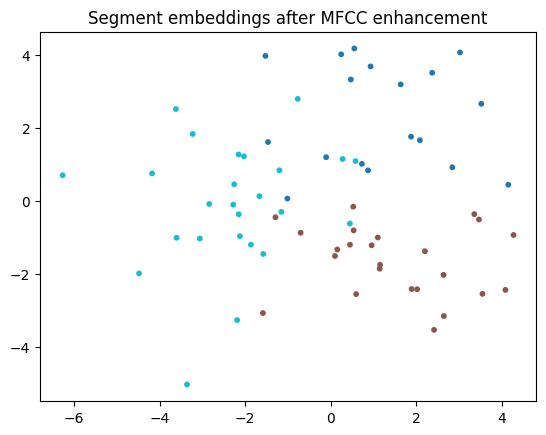

In [23]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X_2d = PCA(n_components=2).fit_transform(X)

plt.scatter(X_2d[:,0], X_2d[:,1], c=labels, cmap="tab10", s=10)
plt.title("Segment embeddings after MFCC enhancement")
plt.show()


#So.. this one seems to catch bits of the 3rd speaker
still using sample3.wav (the Ha sisters audio), our mfcc is now using delta delta mfcc

and exctracting at a deeper level

yet... its not ... perfect but appreciatin the improvement